# Feature Extraction from Text

This notebook is divided into two sections:
* First, we'll find out what what is necessary to build an NLP system that can turn a body of text into a numerical array of *features* by manually calcuating frequencies and building out TF-IDF.
* Next we'll show how to perform these steps using scikit-learn tools.

# Part One: Core Concepts on Feature Extraction


In this section we'll use basic Python to build a rudimentary NLP system. We'll build a *corpus of documents* (two small text files), create a *vocabulary* from all the words in both documents, and then demonstrate a *Bag of Words* technique to extract features from each document.<br>

## Start with some documents:
For simplicity we won't use any punctuation in the text files One.txt and Two.txt. Let's quickly open them and read them. Keep in mind, you should avoid opening and reading entire files if they are very large, as Python could just display everything depending on how you open the file.


In [2]:
with open('One.txt') as mytext:
    print(mytext.read())

This is a story about dogs
our canine pets
Dogs are furry animals



In [3]:
with open('Two.txt') as mytext:
    print(mytext.read())

This story is about surfing
Catching waves is fun
Surfing is a popular water sport



### Reading entire text as a string

In [4]:
with open('One.txt') as mytext:
    entire_text = mytext.read()

In [5]:
entire_text

'This is a story about dogs\nour canine pets\nDogs are furry animals\n'

In [6]:
print(entire_text)

This is a story about dogs
our canine pets
Dogs are furry animals



### Reading Each Line as a List

In [7]:
with open('One.txt') as mytext:
    lines = mytext.readlines()

In [8]:
lines

['This is a story about dogs\n',
 'our canine pets\n',
 'Dogs are furry animals\n']

### Reading in Words Separately

In [9]:
with open('One.txt') as f:
    words = f.read().lower().split()

In [10]:
words

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

## Building a vocabulary (Creating a "Bag of Words")

Let's create dictionaries that correspond to unique mappings of the words in the documents. We can begin to think of this as mapping out all the possible words available for all (both) documents.

In [11]:
with open('One.txt') as f:
    words_one = f.read().lower().split()

In [12]:
words_one

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [13]:
len(words_one)

13

In [14]:
uniq_words_one = set(words)
uniq_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

**Repeat for Two.txt**

In [15]:
with open('Two.txt') as f:
    words_two = f.read().lower().split()
    uniq_words_two = set(words_two)

In [16]:
uniq_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

**Get all unique words across all documents**

In [17]:
all_uniq_words = set()
all_uniq_words.update(uniq_words_one)
all_uniq_words.update(uniq_words_two)
all_uniq_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [18]:
full_vocab = dict()
i = 0
for word in all_uniq_words:
    full_vocab[word] = i
    i += 1

In [19]:
# Do not expect this to be in alphabetical order!
# The for loop goes through the set() in the most efficient way possible, not in alphabetical order!
full_vocab

{'furry': 0,
 'about': 1,
 'fun': 2,
 'water': 3,
 'dogs': 4,
 'this': 5,
 'our': 6,
 'canine': 7,
 'surfing': 8,
 'is': 9,
 'sport': 10,
 'story': 11,
 'popular': 12,
 'catching': 13,
 'a': 14,
 'pets': 15,
 'are': 16,
 'animals': 17,
 'waves': 18}

## Bag of Words to Frequency Counts

Now that we've encapsulated our "entire language" in a dictionary, let's perform *feature extraction* on each of our original documents:

**Empty counts per doc**

In [20]:
# Create an empty vector with space for each word in the vocabulary:
one_freq = [0]*len(full_vocab)
two_freq = [0]*len(full_vocab)
all_words = ['']*len(full_vocab)

print(two_freq)
print(one_freq)
print(all_words)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [21]:
for word in full_vocab.keys():
    # returns the value for each word as index
    word_ind = full_vocab[word]
    # that value as index is used to fetch the particular word
    all_words[word_ind] = word

all_words

['furry',
 'about',
 'fun',
 'water',
 'dogs',
 'this',
 'our',
 'canine',
 'surfing',
 'is',
 'sport',
 'story',
 'popular',
 'catching',
 'a',
 'pets',
 'are',
 'animals',
 'waves']

**Add in counts per word per doc:**

In [22]:
# map the frequencies of each word in 1.txt to our vector:
with open('One.txt') as f:
    one_text = f.read().lower().split()

for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] += 1

In [23]:
one_freq

[1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

In [24]:
# Do the same for the second document:
with open('Two.txt') as f:
    two_text = f.read().lower().split()

for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind] += 1

In [25]:
two_freq

[0, 1, 1, 1, 0, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [26]:
import pandas as pd
pd.DataFrame(data=[one_freq, two_freq], columns=all_words)

,furry,about,fun,water,dogs,this,our,canine,surfing,is,sport,story,popular,catching,a,pets,are,animals,waves
0,1,1,0,0,2,1,1,1,0,1,0,1,0,0,1,1,1,1,0
1,0,1,1,1,0,1,0,0,2,3,1,1,1,1,1,0,0,0,1


By comparing the vectors we see that some words are common to both, some appear only in `One.txt`, others only in `Two.txt`. Extending this logic to tens of thousands of documents, we would see the vocabulary dictionary grow to hundreds of thousands of words. Vectors would contain mostly zero values, making them **sparse matrices**.


# Concepts to Consider:

## Bag of Words and Tf-idf
In the above examples, each vector can be considered a *bag of words*. By itself these may not be helpful until we consider *term frequencies*, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider *inverse document frequency*, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency).

Together these terms become [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Stop Words and Word Stems
Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say `cat` in place of both `cat` and `cats`. This will shrink our vocab array and improve performance.

## Tokenization and Tagging
When we created our vectors the first thing we did was split the incoming text on whitespace with `.split()`. This was a crude form of *tokenization* - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated *morphology* to parse text appropriately.

Once the text is divided, we can go back and *tag* our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become ***high dimensional sparse matrices***.

# Part Two:  Feature Extraction with Scikit-Learn

Let's explore the more realistic process of using sklearn to complete the tasks mentioned above!

# Scikit-Learn's Text Feature Extraction Options

In [27]:
text = ['This is a line',
        "This is another line",
        "Completely different line"]

### CountVectorizer

- Functionality: Converts a collection of text documents into a matrix of token counts.

- Process:
    - Splits the text into tokens (words).
    - Counts the occurrences of each word in the document creating a sparse matrix.

- Output: The result is a document-term matrix (DTM) where each row represents a document and each column represents a word, with values being word counts.

- Use Case: Useful for basic text representation where frequency of occurrence matters but without considering importance or rarity of words across the documents.

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

cv = CountVectorizer()
cv.fit_transform(text)

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [29]:
sparse_mat = cv.fit_transform(text)
sparse_mat.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [30]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [31]:
cv = CountVectorizer(stop_words='english')
cv.fit_transform(text).todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]], dtype=int64)

In [32]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}

## TfidfTransformer

- Converts a raw count matrix (produced by CountVectorizer) into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix. It applies weighting to each term based on its frequency within the document and across the entire corpus.

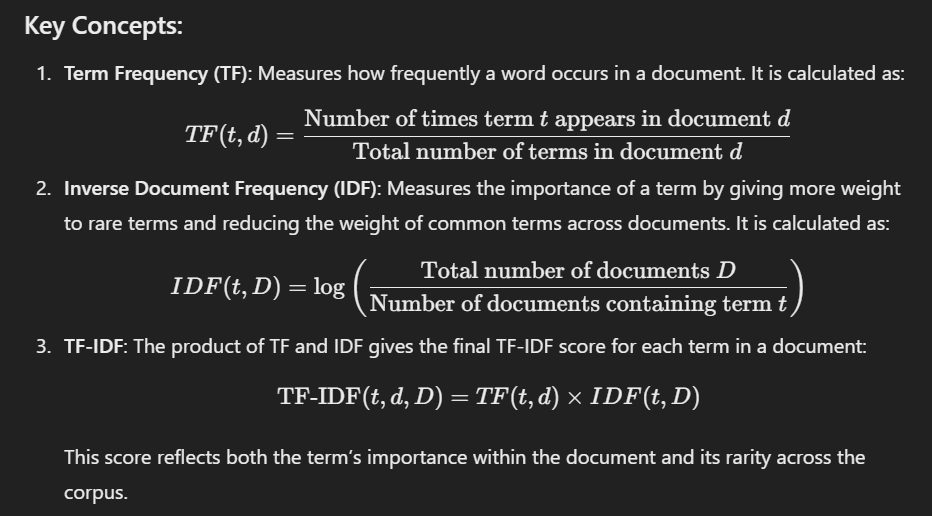

How TfidfTransformer Works:
1. Input: A count matrix, typically obtained by applying CountVectorizer to a collection of documents.

2. Transformation: The transformer calculates the TF-IDF scores for each word in each document, adjusting the raw counts by their importance.

3. Output: A matrix of TF-IDF weights, where each entry represents the importance of a word in a document.


In [34]:
# Producing the raw count matrix
cv = CountVectorizer()
counts = cv.fit_transform(text)
counts

In [47]:
# Converting Counts into tf-idf frequencies
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(counts)

In [48]:
# relative tf-idf frequencies
tfidf.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [50]:
# Takes 2 steps 1. Counts -> 2. TF-IDFs
from sklearn.pipeline import Pipeline
pipe = Pipeline([('cv', CountVectorizer()),
                 ('tfidf', TfidfTransformer())]
                )

In [51]:
results = pipe.fit_transform(text)
results

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [43]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

## TfIdfVectorizer

Does both above in a single step!

In [44]:
tfidf = TfidfVectorizer()
new = tfidf.fit_transform(text)

In [54]:
new.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [55]:
# Same results in just one-step
new.todense() == results.todense()

matrix([[ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True]])